# Basic autoencoder

Ein Autoencoder ist ein spezieller Typ eines neuronalen Netzes, das darauf trainiert ist, seine Eingabe in seine Ausgabe zu kopieren. Bei einem Bild einer handgeschriebenen Ziffer beispielsweise kodiert ein Autoencoder das Bild zunächst in eine latente Darstellung mit niedrigeren Dimensionen und dekodiert dann die latente Darstellung zurück in ein Bild. Ein Autoencoder lernt, die Daten zu komprimieren und gleichzeitig den Rekonstruktionsfehler zu minimieren.

![Basic autoencoder results](../Bilder/intro_autoencoder_result.png)

## Package imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

2022-11-24 21:36:43.223415: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-24 21:36:43.223452: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Dataset laden

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Modell definieren

Ein Autoencoder ist ein spezieller Typ eines neuronalen Netzes, das darauf trainiert ist, seine Eingabe in seine Ausgabe zu kopieren. Bei einem Bild einer handgeschriebenen Ziffer beispielsweise kodiert ein Autoencoder das Bild zunächst in eine latente Darstellung mit niedrigeren Dimensionen und dekodiert dann die latente Darstellung zurück in ein Bild. Ein Autoencoder lernt, die Daten zu komprimieren und gleichzeitig den Rekonstruktionsfehler zu minimieren.

In [ ]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    # dimension of hidden state in center of autoencoder
    self.latent_dim = latent_dim   
    
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

2022-11-24 21:49:55.765969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-24 21:49:55.766033: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-24 21:49:55.766050: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (N-EX4336): /proc/driver/nvidia/version does not exist
2022-11-24 21:49:55.767043: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Trainieren Sie das Modell mit "x_train" als Eingabe und Ziel. Der "Encoder" lernt, den Datensatz von 784 Dimensionen in den latenten Raum zu komprimieren, und der "Decoder" lernt, die Originalbilder zu rekonstruieren.

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093 - val_loss: 0.0094
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

Testen Sie nun das Modell durch encoden und decoden des Testsets.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
def plot_examples(n, x_test, decoded_imgs, title1=None, title2=None):
    plt.figure(figsize=(2 * n, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.title(title1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title(title2)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

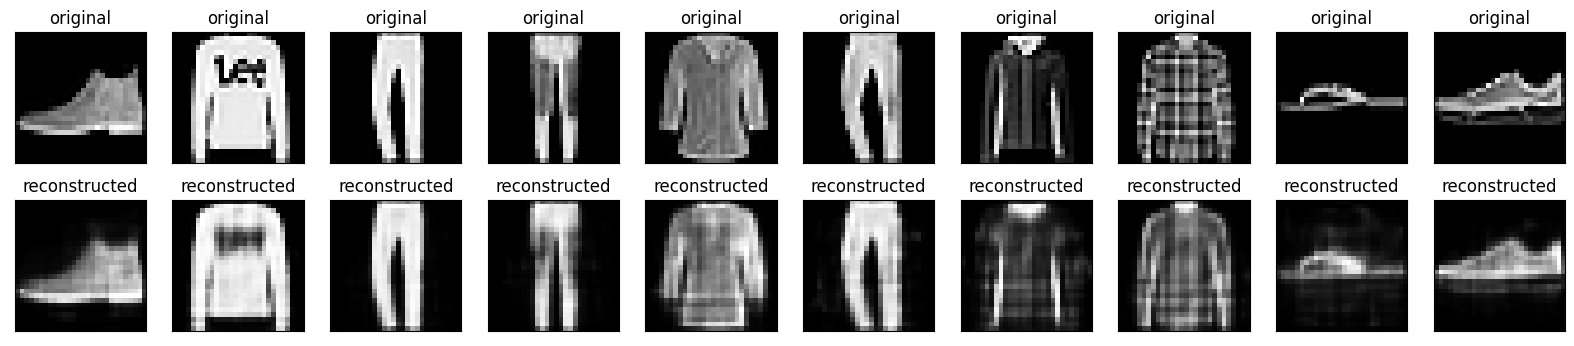

In [ ]:
plot_examples(10, x_test, decoded_imgs, title1="original", title2="reconstructed")

Diese Vorgehensweise dient als Basis für verschiedene Anwendungsmöglichkeiten